In [124]:
import numpy as np
import keras 
import seaborn as sns
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [138]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [140]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [145]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

<Axes: ylabel='count'>

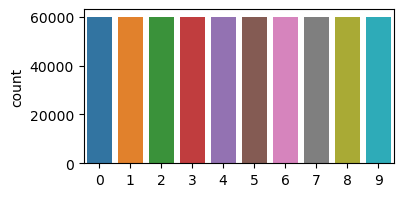

In [147]:
plt.figure(figsize=(4, 2))
sns.countplot(y_train)

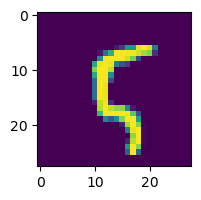

In [149]:
plt.figure(figsize=(4, 2))
plt.imshow(x_train[100][:,:,0])

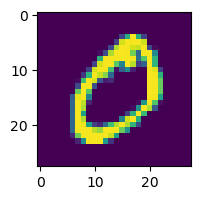

In [151]:
plt.figure(figsize=(4, 2))
plt.imshow(x_train[1][:,:,0])

In [153]:
input_shape = (28, 28, 1)
batch_size = 64
num_classes = 10
epochs = 5
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), 
              loss='categorical_crossentropy', metrics=['acc'])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [155]:
history = model.fit(x_train, y_train, epochs=8, batch_size=500)

Epoch 1/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 319ms/step - acc: 0.6869 - loss: 0.9473
Epoch 2/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 39s 327ms/step - acc: 0.9591 - loss: 0.1375
Epoch 3/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 334ms/step - acc: 0.9742 - loss: 0.0871
Epoch 4/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 347ms/step - acc: 0.9818 - loss: 0.0637
Epoch 5/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 365ms/step - acc: 0.9857 - loss: 0.0522
Epoch 6/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 43s 358ms/step - acc: 0.9864 - loss: 0.0474
Epoch 7/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 352ms/step - acc: 0.9890 - loss: 0.0378
Epoch 8/8
120/120 ━━━━━━━━━━━━━━━━━━━━ 48s 404ms/step - acc: 0.9895 - loss: 0.0353


In [157]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

loss= 0.019068419933319092
accuracy= 0.9932000041007996


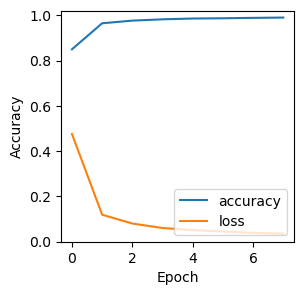

In [161]:
plt.figure(figsize=(3,3))  
plt.plot(history.history['acc'],label='accuracy')
plt.plot(history.history['loss'],label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1.02])
plt.legend(loc='lower right')

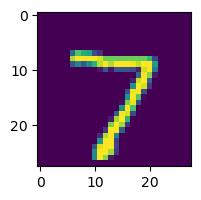

In [167]:
plt.figure(figsize=(2, 2))
plt.imshow(x_test[0][:,:,0])

In [169]:
# 從 x_test 中選擇一張圖片 (比如第 0 張)
test_image = x_test[0]
# 增加 batch 維度
test_image_expanded = np.expand_dims(test_image, axis=0)  # 形狀變為 (1, 28, 28, 1)
# 預測結果
prediction = model.predict(test_image_expanded)

# 獲得預測的類別
predicted_class = np.argmax(prediction)
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
Predicted class: 7


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


<Axes: >

<Figure size 200x200 with 0 Axes>

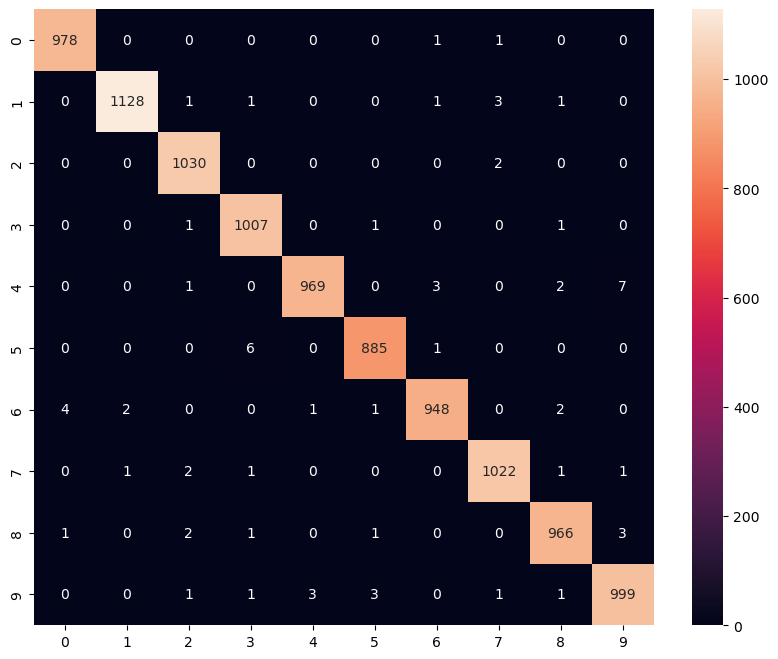

In [165]:
plt.figure(figsize=(2, 2))
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

In [15]:
from tensorflow.keras.applications import VGG19

base = VGG19(weights='imagenet',
             include_top=False,
             input_shape=(106, 83, 3))

model = models.Sequential()
model.add(base)
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)                   │ (None, 3, 2, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,598,273 (82.39 MB)

 Trainable params: 21,598,273 (82.39 MB)

 Non-trainable params: 0 (0.00 B)